In [0]:
import pandas as pd
import numpy as np

### Logistic Regression

In [0]:
class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.theta = None # final theta after calling fit()
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        # prediction using sigmoid function
        h = self.sigmoid(X * theta)
        
        # determine regularization
        if self.regNorm == 2:
          # regTheta = np.linalg.norm(theta, 2)
          regTheta = theta.T * theta
        elif self.regNorm == 1:
          # regTheta = np.linalg.norm(theta, 1)
          regTheta = np.sum(np.abs(theta))

        # compute cost function and return scalar value
        J = (-y.T * np.log(h) - (1.0 - y).T * np.log(1.0 - h)) + (0.5 * regLambda * regTheta)
        J_scalar = J.tolist()[0][0]

        return J_scalar
    

    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        # prediction using sigmoid function
        h = self.sigmoid(X * theta)

        # compute gradient based on regularization
        if self.regNorm == 2:
          gradient = (X.T * (h - y)) + (regLambda * theta)
        elif self.regNorm == 1:
          gradient = (X.T * (h - y)) + (regLambda * np.sign(theta))

        # theta_0 is not regularized
        gradient[0] = sum(h - y)
        return gradient


    def hasConverged(self, theta_old, theta_new):
        '''
        Determines whether or not gradient descent has converged
        Arguments:
          theta_old
          theta_new
        Returns:
          boolean True if norm <= epsilon
        '''
        # compute l2 norm of difference between thetas and return boolean
        if np.linalg.norm(theta_new - theta_old) <= self.epsilon:
          return True
        else:
          return False


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        # convert X, y to numpy array
        X = np.array(X)
        y = np.array(y)

        # add ones for bias term and reshape y
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(X.shape[0], 1)

        # if no initTheta given, initialize random values
        if self.initTheta is None:
          theta_old = np.matrix(np.random.randn((X.shape[1]))).T
        else:
          theta_old = self.initTheta

        # loop through maxNumIters to update theta until gradient descent converges
        for i in range(self.maxNumIters):
          theta_new = theta_old - self.alpha * self.computeGradient(theta_old, X, y, self.regLambda)
          if self.hasConverged(theta_old, theta_new) is True:
            break
          else:
            theta_old = theta_new

        # initialize final theta value for predict()
        self.theta = theta_new


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        # convert X to numpy array
        X = np.array(X)

        # add bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # get predictions by calling sigmoid function with final theta
        y_pred = self.sigmoid(X * self.theta)

        # convert probabilities to binary values
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0

        return pd.DataFrame(y_pred)


    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        # convert X to numpy array
        X = np.array(X)

        # add bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # get predictions by calling sigmoid function with final theta
        y_pred = self.sigmoid(X * self.theta)

        return pd.DataFrame(y_pred)


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1 / (1 + np.exp(-Z))

        

# Test Logistic Regression 1

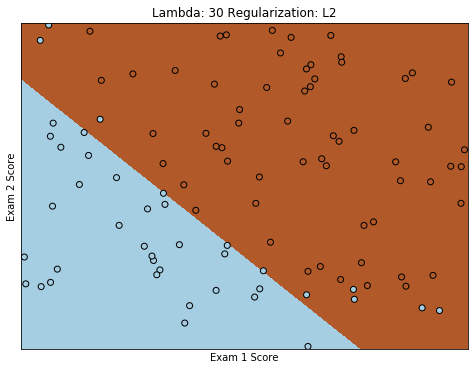

In [0]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    regLambda = 30
    regNorm = 2
    logregModel = LogisticRegression(regLambda = regLambda, regNorm = regNorm)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.title('Lambda: ' + str(regLambda) + ' Regularization: L' + str(regNorm))
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg1()

# Map Feature

In [0]:
from sklearn.preprocessing import PolynomialFeatures

def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    # extract columns as array
    X1 = np.array(X[column1])
    X2 = np.array(X[column2])

    # X1 = X1.reshape(X.shape[0], 1)
    # X2 = X2.reshape(X.shape[0], 1)

    # compute number of terms: (n+1)*(n+2)/2 - 1
    num_of_terms = int((((maxPower + 1) * (maxPower + 2)) / 2) - 1)

    # fill output with ones
    res = np.ones((X.shape[0], num_of_terms))

    # compute poly terms
    m = 0
    for i in range(1, maxPower + 1):
      for j in range(i + 1):
        res[:,m] = np.power(X1, (i-j)) * np.power(X2, j)
        m += 1

    return np.array(res)


# Test Logistic Regression 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:180: RuntimeWarning: overflow encountered in exp


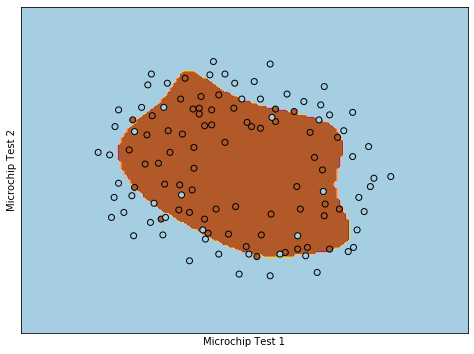

0.0 1.0


In [0]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.00000001, regNorm=2)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

# Logistic Regression with Adagrad

In [0]:
class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.theta = None # final theta after calling fit()
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        # prediction using sigmoid function
        h = self.sigmoid(X * theta)
        
        # determine regularization
        if self.regNorm == 2:
          regTheta = np.linalg.norm(theta, 2)
        elif self.regNorm == 1:
          regTheta = np.linalg.norm(theta, 1)

        # compute cost function and return scalar value
        J = (-y.T * np.log(h) - (1.0 - y).T * np.log(1.0 - h)) + (regLambda/2 * regTheta)
        J_scalar = J.tolist()[0][0]

        return J_scalar
    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        # prediction using sigmoid function
        h = self.sigmoid(X * theta)

        # compute gradient based on regularization
        if self.regNorm == 2:
          gradient = (X.T * (h - y)) + (regLambda * theta)
        elif self.regNorm == 1:
          gradient = (X.T * (h - y)) + (regLambda * np.sign(theta))

        # theta_0 is not regularized
        gradient[0] = sum(h - y)
        return gradient  


    def hasConverged(self, theta_old, theta_new):
        '''
        Determines whether or not gradient descent has converged
        Arguments:
          theta_old
          theta_new
        Returns:
          boolean True if norm <= epsilon
        '''
        # compute l2 norm of difference between thetas and return boolean
        if np.linalg.norm(theta_new - theta_old) <= self.epsilon:
          return True
        else:
          return False


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        # convert X, y to numpy array
        X = np.array(X)
        y = np.array(y)

        # add ones for bias term and reshape y
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(X.shape[0], 1)
        
        # get rows and columns of X
        n, d = X.shape

        # if no initTheta given, initialize random values
        if self.initTheta is None:
          theta_old = np.matrix(np.random.randn((d))).T
        else:
          theta_old = self.initTheta

        # loop through maxNumIters to update theta until gradient descent converges
        for i in range(self.maxNumIters):
          # select random instance
          idx = np.random.randint(0,n)
          X_t = X[idx,:].reshape(1,d)
          y_t = y[idx].reshape(1,1)

          # compute gradient and G
          gradient = self.computeGradient(theta_old, X_t, y_t, self.regLambda)
          GHist = gradient.T * gradient
          
          # implement adagrad using per-feature learning rate
          alpha_t = float(self.alpha / (np.sqrt(GHist) + 0.00000001))
          theta_new = theta_old - alpha_t * gradient
          if self.hasConverged(theta_old, theta_new) is True:
            break
          else:
            theta_old = theta_new

        # initialize final theta value for predict()
        self.theta = theta_new


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        # convert X to numpy array
        X = np.array(X)

        # add bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # get predictions by calling sigmoid function with final theta
        y_pred = self.sigmoid(X * self.theta)

        # convert probabilities to binary values
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0

        return pd.DataFrame(y_pred)


    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        # convert X to numpy array
        X = np.array(X)

        # add bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # get predictions by calling sigmoid function with final theta
        y_pred = self.sigmoid(X * self.theta)

        return pd.DataFrame(y_pred)

    
    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1 / (1 + np.exp(-Z))



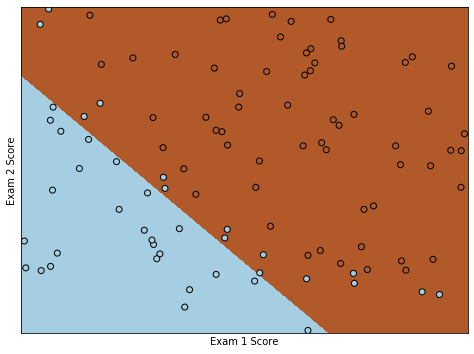

In [0]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg3():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0.00000001)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg3()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import random
import numpy as np
from sklearn.metrics import accuracy_score

def cross_validated_accuracy(Classifier, X, y, num_trials, num_folds, random_seed):
    """
    Args:
        Classifier: custom classifier
        X: Input features
        y: Labels
        num_trials: Number of trials to run of cross validation
        num_folds: Number of folds (the "k" in "k-folds")
        random_seed: Seed for uniform execution
    Returns:
        cvScore: The mean accuracy of the cross-validation experiment
    """
    random.seed(random_seed)

    # Combine X,y
    X = np.array(X)
    y = np.array(y)
    dataset = np.concatenate((X,y.reshape(-1,1)),axis=1)

    # Store each cv score in list
    scores = []

    # Loop through trials
    for i in range(num_trials):
      # Shuffle dataset
      np.random.shuffle(dataset)

      # Split dataset into folds
      data_split = np.array(np.array_split(dataset, num_folds))

      # Loop through folds
      for k in range(len(data_split)):
      
        # Test set
        test_set = data_split[k]

        # Train set
        train_lst = []
        for i in range(len(data_split)):
          if i != k:
            train_lst.append(data_split[i])
        train_set = np.concatenate(train_lst,axis=0)

        # Split into X,y
        X_train = train_set[:,:-1]
        y_train = train_set[:,-1]
        X_test = test_set[:,:-1]
        y_test = test_set[:,-1]
       
        # Use clf from parameter and record score
        clf = Classifier
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)

        scores.append(accuracy_score(y_test,y_pred))

    # Average
    cvScore = np.mean(scores)

    return cvScore

In [0]:
# set file path
filepath1 = '/content/drive/My Drive/hw3-wdbc.csv'
filepath2 = '/content/drive/My Drive/hw3-retinopathy.csv'
filepath3 = '/content/drive/My Drive/hw3-diabetes.csv'

# load data
df1 = pd.read_csv(filepath1, header=None)
df2 = pd.read_csv(filepath2, header=None)
df3 = pd.read_csv(filepath3, header=None)

# separate data into features and labels
X1 = df1[df1.columns[0:-1]]
y1 = df1[df1.columns[-1]]
X2 = df2[df2.columns[0:-1]]
y2 = df2[df2.columns[-1]]
X3 = df3[df3.columns[0:-1]]
y3 = df3[df3.columns[-1]]

# standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X1 = pd.DataFrame(standardizer.fit_transform(X1))
X2 = pd.DataFrame(standardizer.fit_transform(X2))
X3 = pd.DataFrame(standardizer.fit_transform(X3))

# Binary encode y
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y1 = lb.fit_transform(y1)
y2 = lb.fit_transform(y2)
y3 = lb.fit_transform(y3)

In [0]:
# train logistic regressions and get cv scores
logregModel1 = LogisticRegression(alpha=0.01, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModel2 = LogisticRegression(alpha=0.01, regLambda=0.10, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModel3 = LogisticRegression(alpha=0.01, regLambda=10.0, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModel4 = LogisticRegression(alpha=0.01, regLambda=1e-8, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModel5 = LogisticRegression(alpha=0.01, regLambda=0.10, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModel6 = LogisticRegression(alpha=0.01, regLambda=10.0, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)

print(cross_validated_accuracy(logregModel1, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModel2, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModel3, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModel4, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModel5, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModel6, X1, y1, 3, 3, 42))

print(cross_validated_accuracy(logregModel1, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModel2, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModel3, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModel4, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModel5, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModel6, X2, y2, 3, 3, 42))

print(cross_validated_accuracy(logregModel1, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModel2, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModel3, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModel4, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModel5, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModel6, X3, y3, 3, 3, 42))

0.968368451994183
0.9660292707076332
0.9730622853429871
0.9701197438039544
0.9695473251028806
0.9373093226894397
0.6571195665312833
0.628155672807272
0.5603710351996906
0.6530829948747704
0.6379732375979112
0.6165362694613674
0.7690972222222222
0.7708333333333334
0.7686631944444444
0.7703993055555556
0.7703993055555556
0.7513020833333334


In [0]:
# train adagrad logistic regressions and get cv scores
logregModelAdagrad1 = LogisticRegressionAdagrad(alpha=0.01, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModelAdagrad2 = LogisticRegressionAdagrad(alpha=0.01, regLambda=0.10, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModelAdagrad3 = LogisticRegressionAdagrad(alpha=0.01, regLambda=10.0, regNorm=2, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModelAdagrad4 = LogisticRegressionAdagrad(alpha=0.01, regLambda=1e-8, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModelAdagrad5 = LogisticRegressionAdagrad(alpha=0.01, regLambda=0.10, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)
logregModelAdagrad6 = LogisticRegressionAdagrad(alpha=0.01, regLambda=10.0, regNorm=1, epsilon=0.001, maxNumIters=1000, initTheta=None)

print(cross_validated_accuracy(logregModelAdagrad1, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad2, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad3, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad4, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad5, X1, y1, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad6, X1, y1, 3, 3, 42))

print(cross_validated_accuracy(logregModelAdagrad1, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad2, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad3, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad4, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad5, X2, y2, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad6, X2, y2, 3, 3, 42))

print(cross_validated_accuracy(logregModelAdagrad1, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad2, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad3, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad4, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad5, X3, y3, 3, 3, 42))
print(cross_validated_accuracy(logregModelAdagrad6, X3, y3, 3, 3, 42))

0.9291376589622204
0.9168012624152975
0.672762152294316
0.9244500139236982
0.8622946254525201
0.49497199789597457
0.5346368520936079
0.5525774223962866
0.5171949037810656
0.528815818102698
0.5516972790349095
0.506234285852432
0.6818576388888888
0.7074652777777778
0.6215277777777778
0.69921875
0.6657986111111112
0.5182291666666666


In [0]:
def generateLearningCurve1(X, y):
    '''
    Plots learning curve
        of different logistic models
        with different parameters
        at different steps within gradient descent
        using adagrad
    '''
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # track performance of log model with different parameters
    cvScores1 = []
    cvScores2 = []
    cvScores3 = []
    cvScores4 = []
    cvScores5 = []
    cvScores6 = []
    cvScores7 = []
    cvScores8 = []

    # for every 10 iterations track performance of log model using cv
    iters = 10
    for i in range(1,11):

      logregModel1 = LogisticRegression(alpha=0.1, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore1 = cross_validated_accuracy(logregModel1, X, y, 3, 3, 42)
      cvScores1.append(cvScore1)

      logregModel2 = LogisticRegression(alpha=0.01, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore2 = cross_validated_accuracy(logregModel2, X, y, 3, 3, 42)
      cvScores2.append(cvScore2)

      logregModel3 = LogisticRegression(alpha=0.001, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore3 = cross_validated_accuracy(logregModel3, X, y, 3, 3, 42)
      cvScores3.append(cvScore3)

      logregModel4 = LogisticRegression(alpha=0.2, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore4 = cross_validated_accuracy(logregModel4, X, y, 3, 3, 42)
      cvScores4.append(cvScore4)

      logregModel5 = LogisticRegression(alpha=0.5, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore5 = cross_validated_accuracy(logregModel5, X, y, 3, 3, 42)
      cvScores5.append(cvScore5)

      logregModel6 = LogisticRegression(alpha=0.1, regLambda=1e-8, regNorm=1, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore6 = cross_validated_accuracy(logregModel6, X, y, 3, 3, 42)
      cvScores6.append(cvScore6)

      logregModel7 = LogisticRegression(alpha=0.1, regLambda=0.1, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore7 = cross_validated_accuracy(logregModel7, X, y, 3, 3, 42)
      cvScores7.append(cvScore7)

      logregModel8 = LogisticRegression(alpha=0.1, regLambda=1.0, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore8 = cross_validated_accuracy(logregModel8, X, y, 3, 3, 42)
      cvScores8.append(cvScore8)

    # define X, y on axis
    X = [i*iters for i in range(1,11)]
    y1 = cvScores1
    y2 = cvScores2
    y3 = cvScores3
    y4 = cvScores4
    y5 = cvScores5
    y6 = cvScores6
    y7 = cvScores7
    y8 = cvScores8

    # plot title and axis
    plt.figure(figsize=(10.5,8))
    plt.title('Learning Curve')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')

    # plot
    plt.plot(X, y1, label='base: alpha=1e-1, regNorm=L2, regLambda=1E-8', color='red', linestyle='-')
    plt.plot(X, y2, label='alpha=1e-2', color='darkorange', linestyle='-')
    plt.plot(X, y3, label='alpha=1e-3', color='yellow', linestyle='-')
    plt.plot(X, y4, label='alpha=2e-1', color='lime', linestyle='-')
    plt.plot(X, y5, label='alpha=5e-1', color='blue', linestyle='-')
    plt.plot(X, y6, label='regNorm=L1', color='cyan', linestyle='--')
    plt.plot(X, y7, label='regLambda=0.1', color='magenta', linestyle='--')
    plt.plot(X, y8, label='regLambda=1.0', color='darkviolet', linestyle='--')

    # display plot
    plt.legend(loc='lower right')
    plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:179: RuntimeWarning: overflow encountered in exp


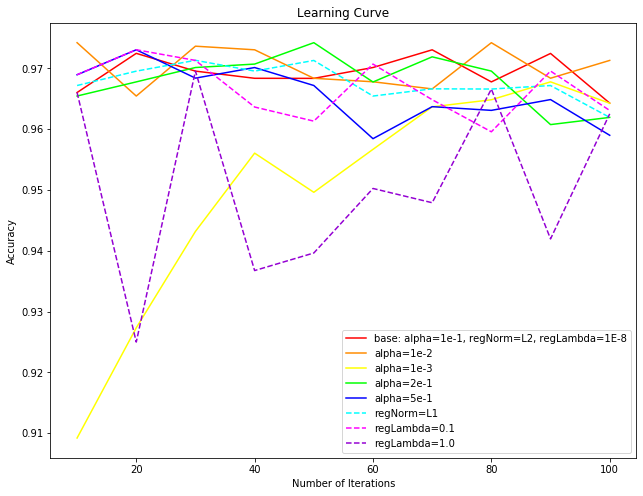

In [0]:
# generateLearningCurve1(X1, y1)

In [0]:
def generateLearningCurve2(X, y):
    '''
    Plots learning curve
        of different logistic models
        with different parameters
        at different steps within gradient descent
        using adagrad
    '''
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # track performance of log model with different parameters
    cvScores1 = []
    cvScores2 = []
    cvScores3 = []
    cvScores4 = []
    cvScores5 = []
    cvScores6 = []
    cvScores7 = []
    cvScores8 = []

    # for every 10 iterations track performance of log model using cv
    iters = 10
    for i in range(1,11):

      logregModelAdagrad1 = LogisticRegressionAdagrad(alpha=0.1, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore1 = cross_validated_accuracy(logregModelAdagrad1, X, y, 3, 3, 42)
      cvScores1.append(cvScore1)

      logregModelAdagrad2 = LogisticRegressionAdagrad(alpha=0.01, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore2 = cross_validated_accuracy(logregModelAdagrad2, X, y, 3, 3, 42)
      cvScores2.append(cvScore2)

      logregModelAdagrad3 = LogisticRegressionAdagrad(alpha=0.001, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore3 = cross_validated_accuracy(logregModelAdagrad3, X, y, 3, 3, 42)
      cvScores3.append(cvScore3)

      logregModelAdagrad4 = LogisticRegressionAdagrad(alpha=0.2, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore4 = cross_validated_accuracy(logregModelAdagrad4, X, y, 3, 3, 42)
      cvScores4.append(cvScore4)

      logregModelAdagrad5 = LogisticRegressionAdagrad(alpha=0.5, regLambda=1e-8, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore5 = cross_validated_accuracy(logregModelAdagrad5, X, y, 3, 3, 42)
      cvScores5.append(cvScore5)

      logregModelAdagrad6 = LogisticRegressionAdagrad(alpha=0.1, regLambda=1e-8, regNorm=1, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore6 = cross_validated_accuracy(logregModelAdagrad6, X, y, 3, 3, 42)
      cvScores6.append(cvScore6)

      logregModelAdagrad7 = LogisticRegressionAdagrad(alpha=0.1, regLambda=0.1, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore7 = cross_validated_accuracy(logregModelAdagrad7, X, y, 3, 3, 42)
      cvScores7.append(cvScore7)

      logregModelAdagrad8 = LogisticRegressionAdagrad(alpha=0.1, regLambda=1.0, regNorm=2, epsilon=0.001, maxNumIters=i*iters, initTheta=None)
      cvScore8 = cross_validated_accuracy(logregModelAdagrad8, X, y, 3, 3, 42)
      cvScores8.append(cvScore8)

    # define X, y on axis
    X = [i*iters for i in range(1,11)]
    y1 = cvScores1
    y2 = cvScores2
    y3 = cvScores3
    y4 = cvScores4
    y5 = cvScores5
    y6 = cvScores6
    y7 = cvScores7
    y8 = cvScores8

    # plot title and axis
    plt.figure(figsize=(10.5,8))
    plt.title('Learning Curve')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')

    # plot
    plt.plot(X, y1, label='base: alpha=1e-1, regNorm=L2, regLambda=1E-8', color='red', linestyle='-')
    plt.plot(X, y2, label='alpha=1e-2', color='darkorange', linestyle='-')
    plt.plot(X, y3, label='alpha=1e-3', color='yellow', linestyle='-')
    plt.plot(X, y4, label='alpha=2e-1', color='lime', linestyle='-')
    plt.plot(X, y5, label='alpha=5e-1', color='blue', linestyle='-')
    plt.plot(X, y6, label='regNorm=L1', color='cyan', linestyle='--')
    plt.plot(X, y7, label='regLambda=0.1', color='magenta', linestyle='--')
    plt.plot(X, y8, label='regLambda=1.0', color='darkviolet', linestyle='--')

    # display plot
    plt.legend(loc='lower right')
    plt.show()



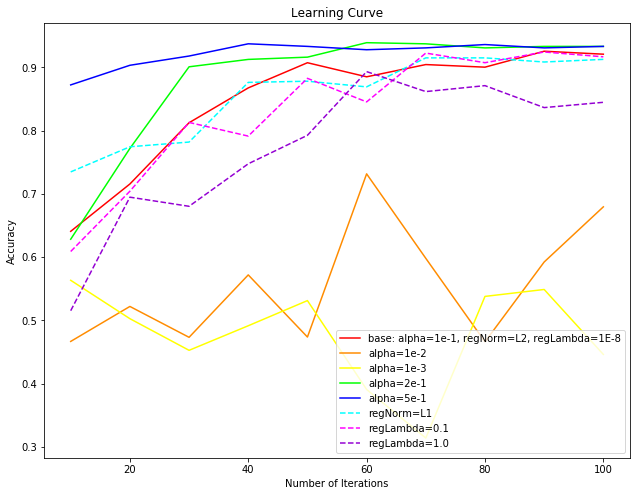

In [0]:
generateLearningCurve2(X1, y1)